# House Price Prediction using Machine Learning Techniques

## Importing LIbraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset & Data Preprocessing

In [3]:
data = pd.read_csv('ames_housing_no_missing.csv')

In [4]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125


In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [6]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
data.shape

(1460, 80)

### Get the statistical data for numerical features( int + float )

In [8]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Cleaning

### Handling Missing value - methods for missing value

### Before Handling

<Axes: >

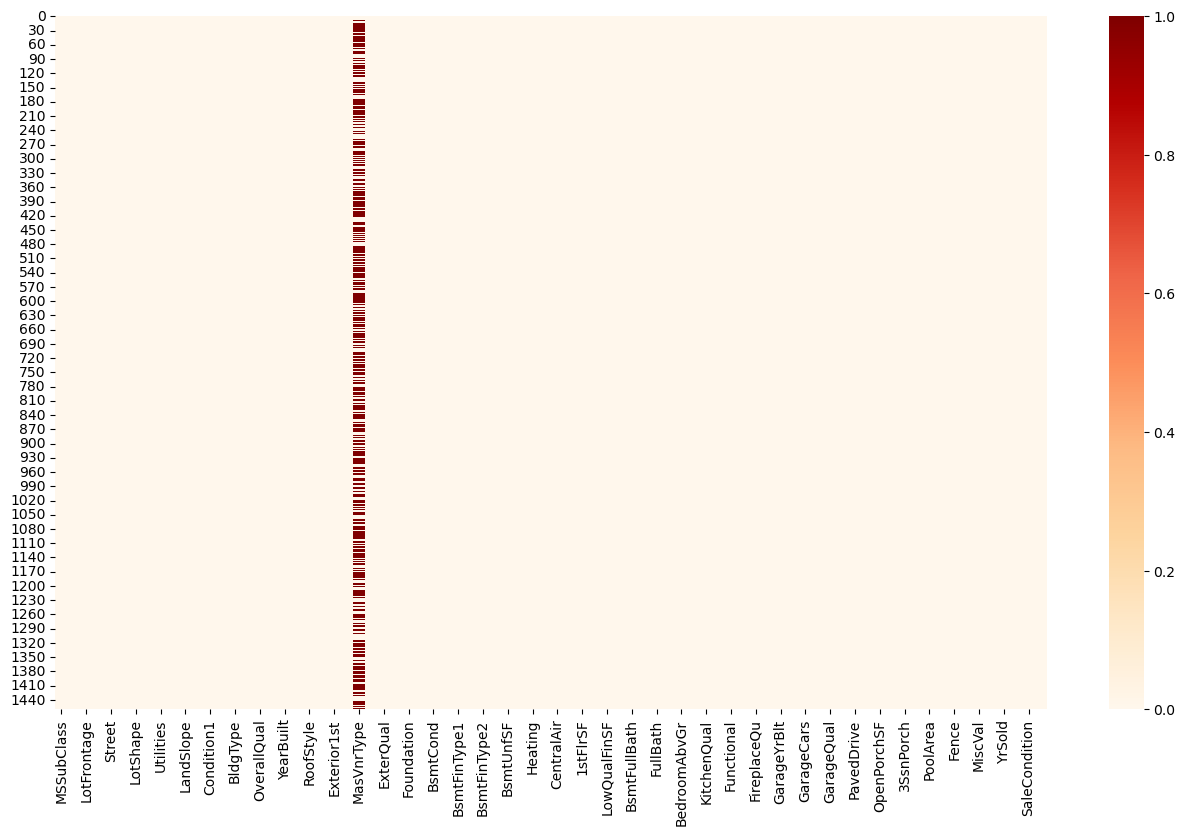

In [9]:
plt.figure(figsize = (16, 9))
sns.heatmap(data.isnull(), cmap = "OrRd")

In [10]:
null_percent = data.isnull().sum() / data.shape[0] * 100
null_percent

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

In [11]:
data["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

#### Missing value imputation

In [12]:
missing_value_feat = null_percent[null_percent > 0]
missing_value_feat

MasVnrType    59.726027
dtype: float64

<Axes: >

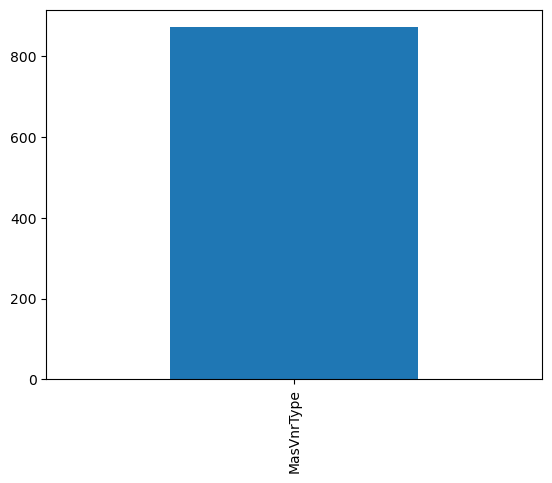

In [13]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar()


<Axes: xlabel='MasVnrType', ylabel='count'>

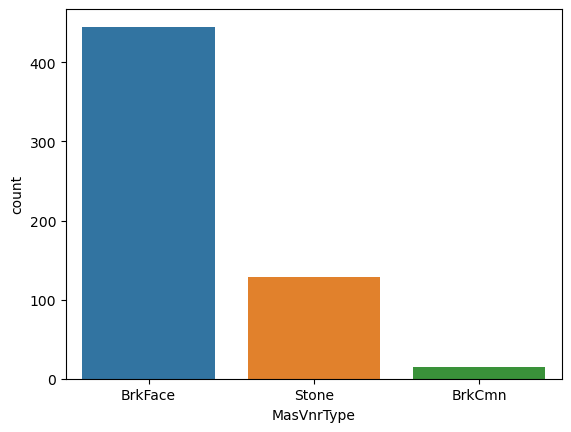

In [14]:
sns.countplot(data, x = "MasVnrType")

In [15]:
data["MasVnrType"].mode()[0]

'BrkFace'

In [16]:
data_cp = data.copy()

In [17]:
data_cp.shape

(1460, 80)

In [18]:
masvnrtype_mode = data["MasVnrType"].mode()[0]
data_cp["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace = True )
data_cp["MasVnrType"].isnull().sum()

0

In [19]:
data_cp["MasVnrType"]

0       BrkFace
1       BrkFace
2       BrkFace
3       BrkFace
4       BrkFace
         ...   
1455    BrkFace
1456      Stone
1457    BrkFace
1458    BrkFace
1459    BrkFace
Name: MasVnrType, Length: 1460, dtype: object

<Axes: xlabel='MasVnrType', ylabel='count'>

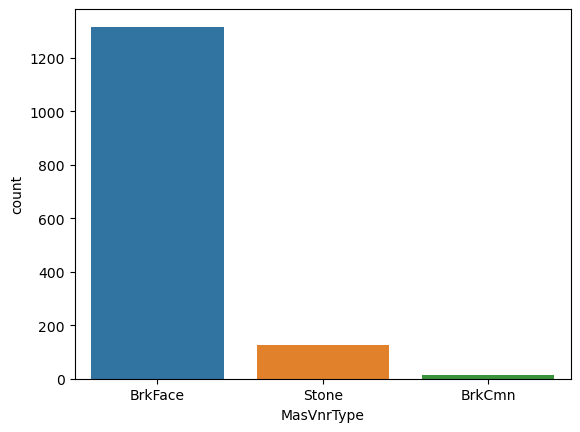

In [20]:
sns.countplot(data_cp, x = "MasVnrType")

In [21]:
data_cp.isnull().any(axis = 1).sum()

0

### After Handling

<Axes: >

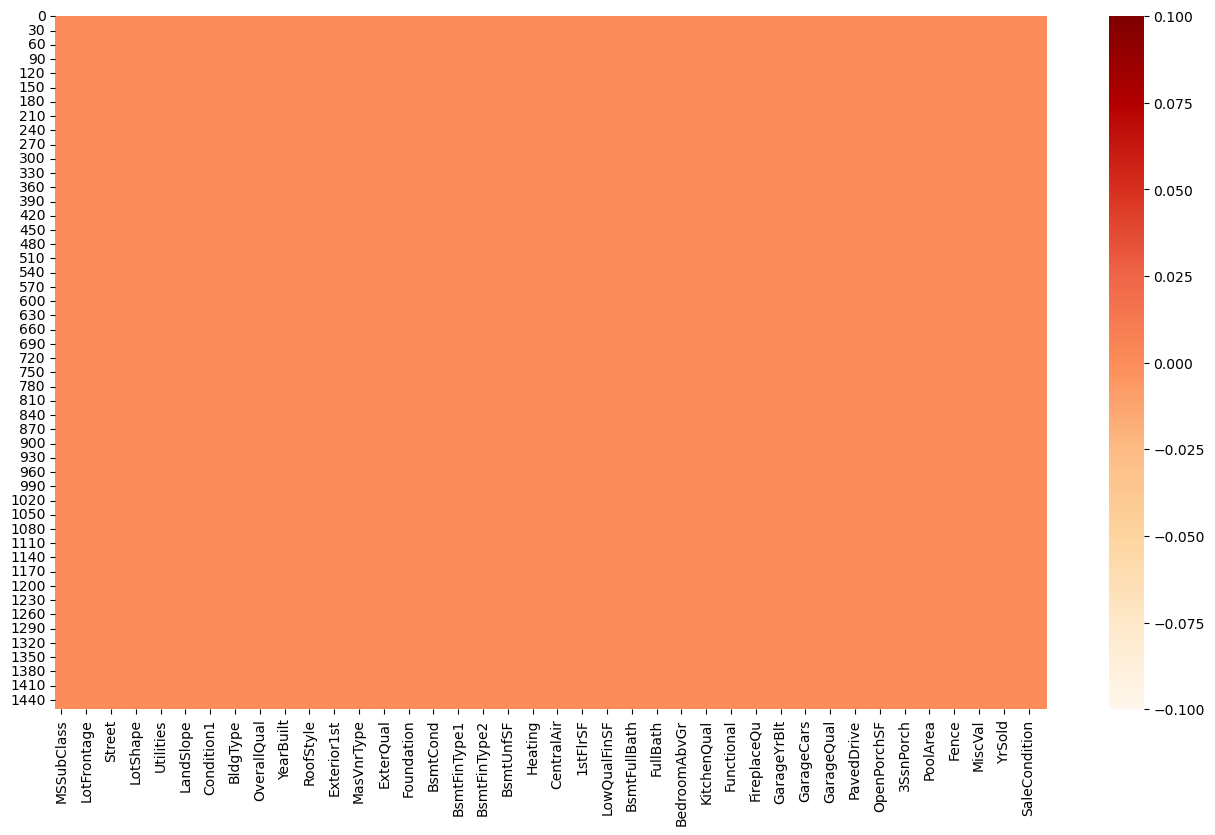

In [22]:
plt.figure(figsize = (16, 9))
sns.heatmap(data_cp.isnull(), cmap = "OrRd")

### Checking unique values

In [23]:
for i in data_cp.columns:
    print(i + "\t" + str(len(data_cp[i].unique())))

MSSubClass	15
MSZoning	5
LotFrontage	111
LotArea	1073
Street	2
Alley	2
LotShape	4
LandContour	4
Utilities	2
LotConfig	5
LandSlope	3
Neighborhood	25
Condition1	9
Condition2	8
BldgType	5
HouseStyle	8
OverallQual	10
OverallCond	9
YearBuilt	112
YearRemodAdd	61
RoofStyle	6
RoofMatl	8
Exterior1st	15
Exterior2nd	16
MasVnrType	3
MasVnrArea	328
ExterQual	4
ExterCond	5
Foundation	6
BsmtQual	4
BsmtCond	4
BsmtExposure	4
BsmtFinType1	6
BsmtFinSF1	637
BsmtFinType2	6
BsmtFinSF2	144
BsmtUnfSF	780
TotalBsmtSF	721
Heating	6
HeatingQC	5
CentralAir	2
Electrical	5
1stFlrSF	753
2ndFlrSF	417
LowQualFinSF	24
GrLivArea	861
BsmtFullBath	4
BsmtHalfBath	3
FullBath	4
HalfBath	3
BedroomAbvGr	8
KitchenAbvGr	4
KitchenQual	4
TotRmsAbvGrd	12
Functional	7
Fireplaces	4
FireplaceQu	5
GarageType	6
GarageYrBlt	97
GarageFinish	3
GarageCars	5
GarageArea	441
GarageQual	5
GarageCond	5
PavedDrive	3
WoodDeckSF	274
OpenPorchSF	202
EnclosedPorch	120
3SsnPorch	20
ScreenPorch	76
PoolArea	8
PoolQC	3
Fence	4
MiscFeature	4
MiscVal	21
Mo

In [24]:
# for i in dataset_mvi.columns:
#     print("Unique value of: >>> {} ({})\n{}\n".format(i, len(dataset_mvi[i].unique()), dataset_mvi[i].unique()))

### Describe the target 

In [25]:
data_cp['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/var/folders/1b/l9shw07j67g31yzczg6s00zm0000gn/T/ipykernel_39008/466689539.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bar = sns.distplot(data_cp["SalePrice"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


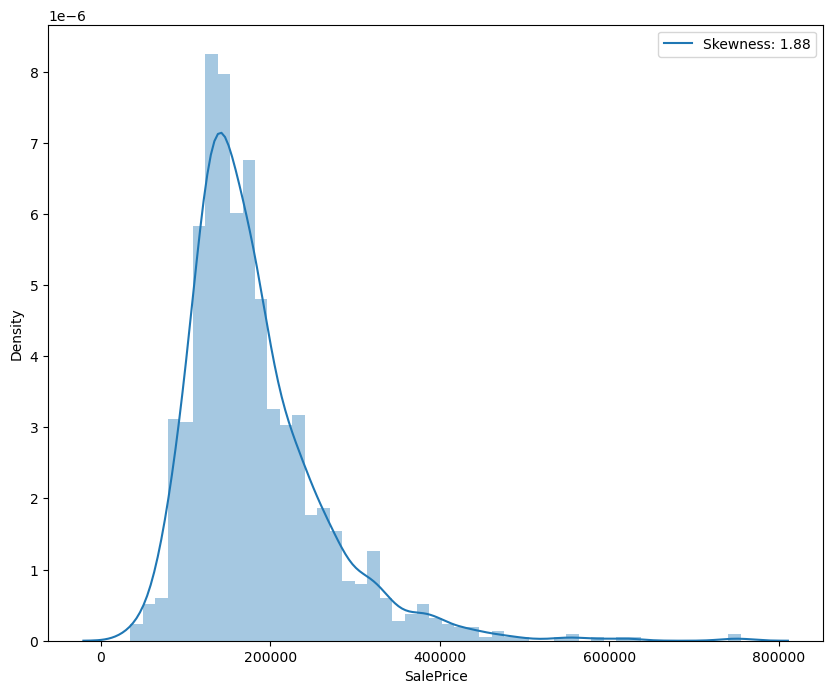

In [26]:
plt.figure(figsize=(10,8))
bar = sns.distplot(data_cp["SalePrice"])
bar.legend(["Skewness: {:.2f}".format(data_cp['SalePrice'].skew())])

### Analyse features according to target variable

In [27]:
numeric_features = data_cp.select_dtypes(include = [np.number])
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
categorical_features = data_cp.select_dtypes(include = [object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Correlation

In [29]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
GarageYrBlt      0.397778
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric data to Sale Price'}>

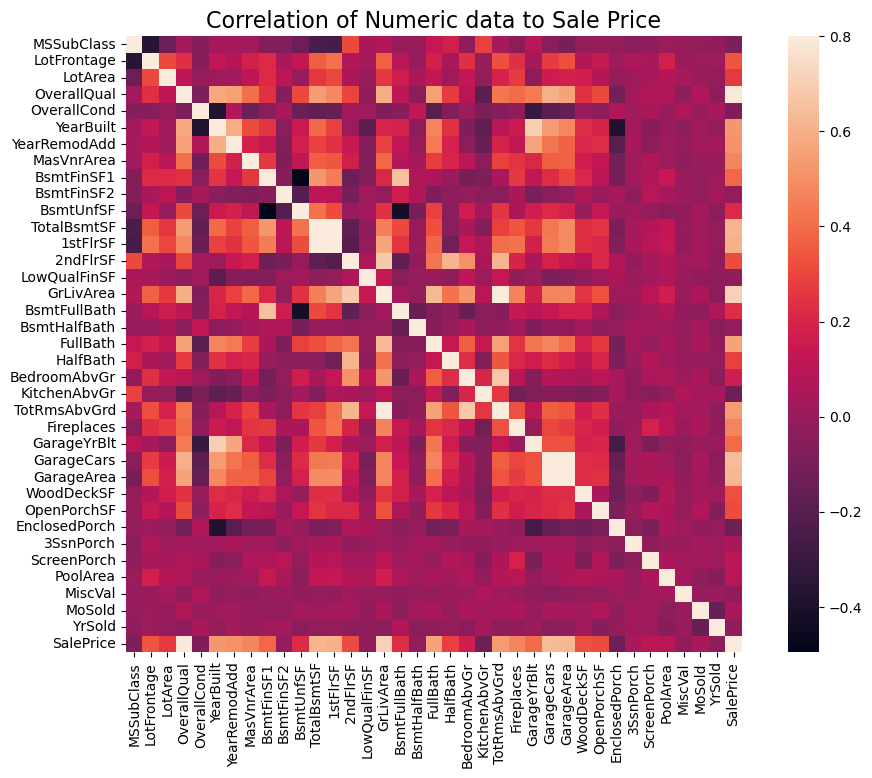

In [30]:
f, ax = plt.subplots(figsize = (12, 8))
plt.title('Correlation of Numeric data to Sale Price', y = 1, size = 16)
sns.heatmap(correlation, square = True, vmax = 0.8)

### Highly correlated features

In [31]:
high_corr = numeric_features.corr()
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) >= 0.5]
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

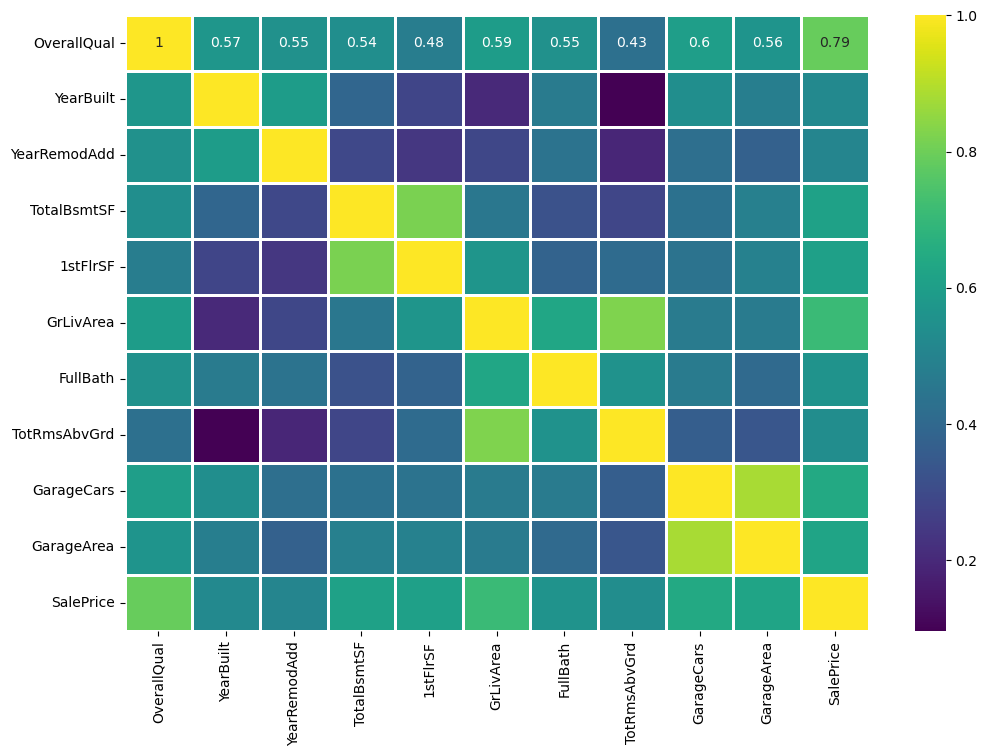

In [32]:
plt.figure(figsize = (12, 8))
ax = sns.heatmap(data_cp[high_corr_features].corr(), cmap = 'viridis', annot = True, linewidth = 2)


### Scatter plot for features

In [33]:
data_cp.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

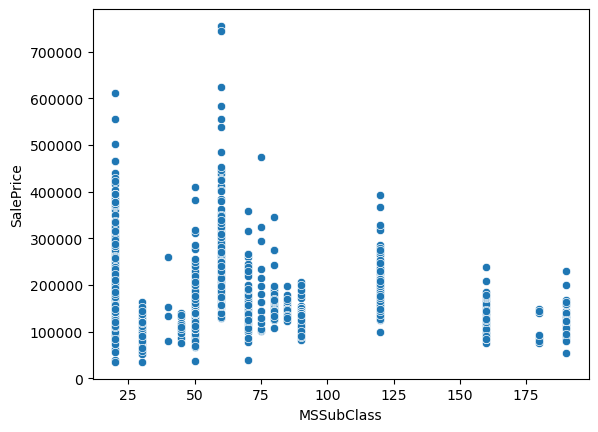

In [34]:
sns.scatterplot(x = 'MSSubClass', y = 'SalePrice', data = data_cp)

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

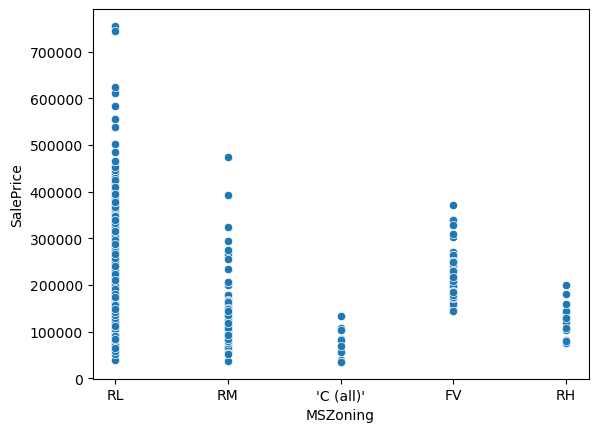

In [35]:
sns.scatterplot(x = 'MSZoning', y = 'SalePrice', data = data_cp)

### Scatter Plots for highly correlated features

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

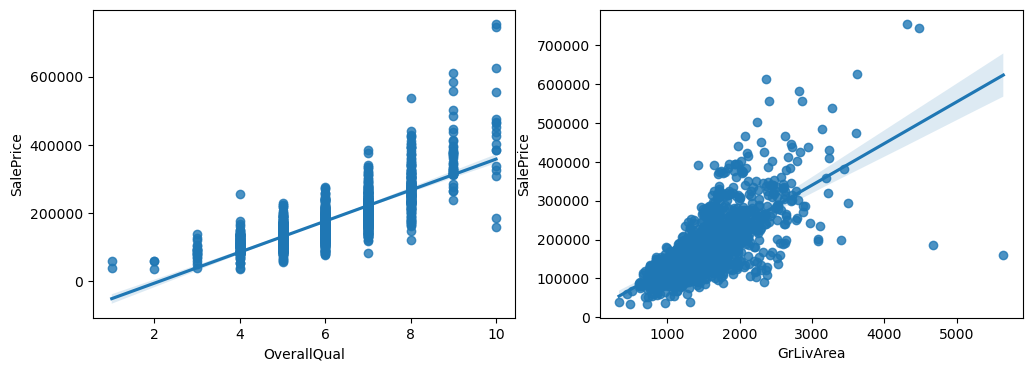

In [36]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
sns.regplot(x = 'OverallQual', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax2)


<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

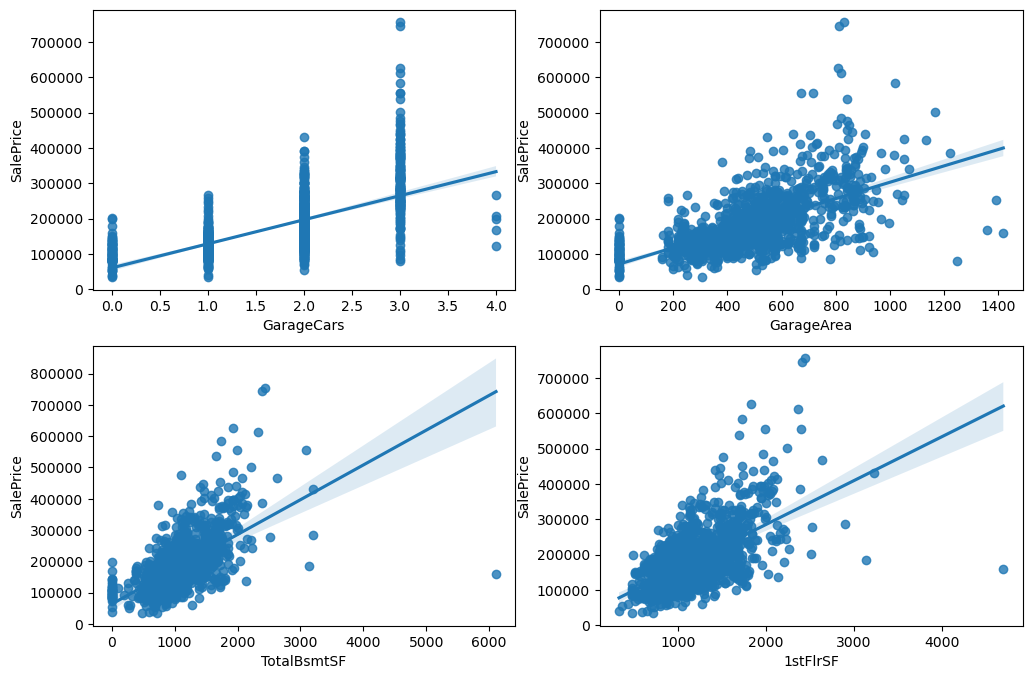

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
sns.regplot(x = 'GarageCars', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = 'GarageArea', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = '1stFlrSF', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax4)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

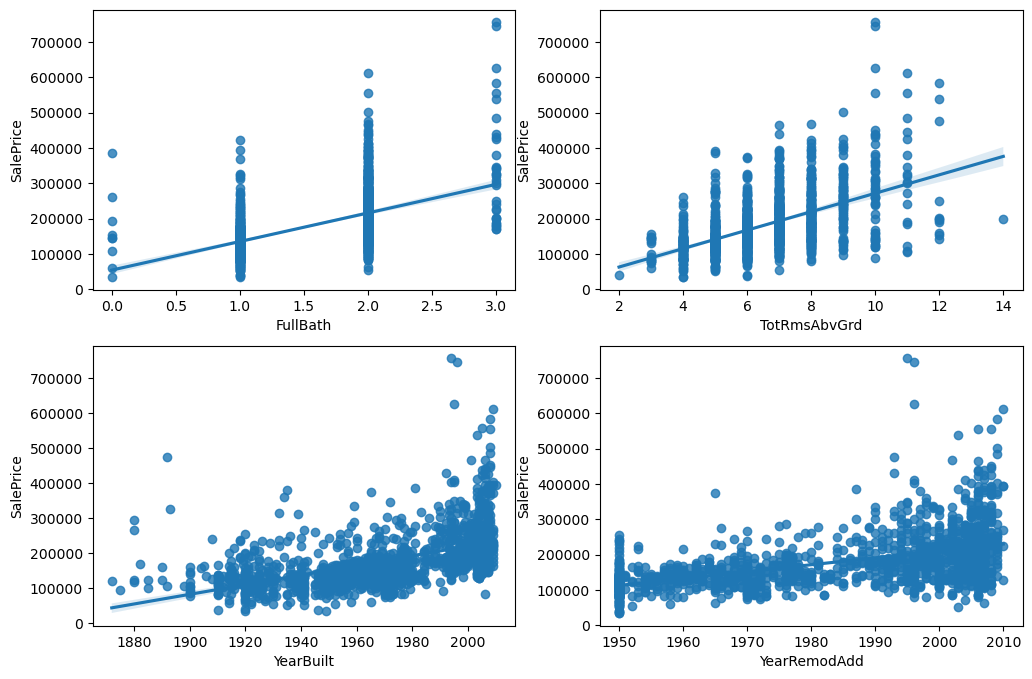

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
sns.regplot(x = 'FullBath', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax1)
sns.regplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax2)
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax3)
sns.regplot(x = 'YearRemodAdd', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True, ax = ax4)


<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

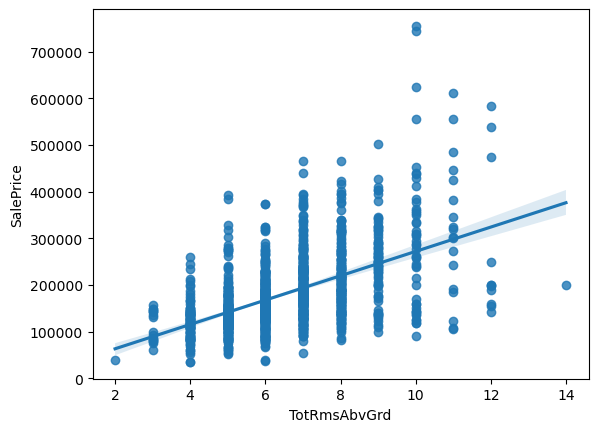

In [39]:
sns.regplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data_cp, scatter = True, fit_reg = True)

### Analysis for yearwise saleprice

<Axes: xlabel='YrSold'>

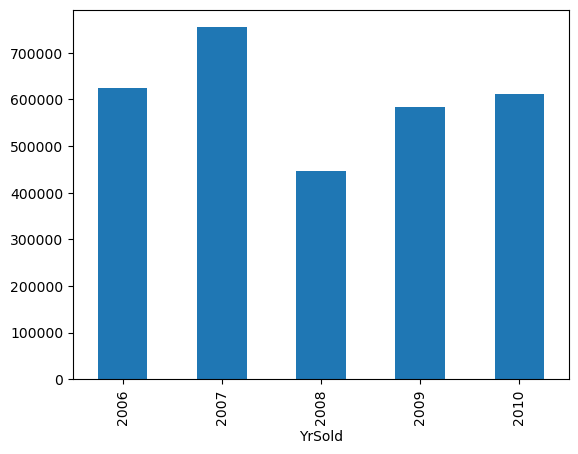

In [40]:
y=data_cp.groupby("YrSold")["SalePrice"].max()
y.plot(kind="bar")

### Analysis of typewise sale

Text(0, 0.5, 'saleprice')

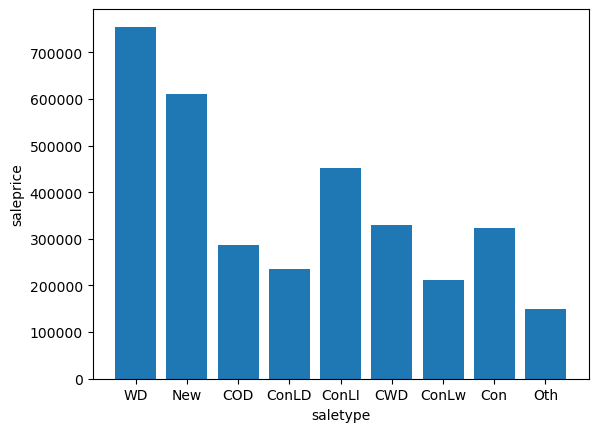

In [41]:
plt.figure()
plt.bar(data_cp["SaleType"],data_cp["SalePrice"])
plt.xlabel("saletype")
plt.ylabel("saleprice")

### Analysis of condition-wise sale

<Figure size 640x480 with 0 Axes>

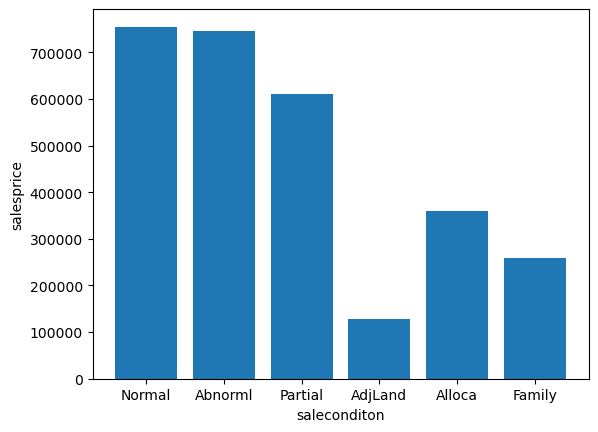

<Figure size 640x480 with 0 Axes>

In [42]:
plt.bar(data_cp["SaleCondition"],data_cp["SalePrice"])
plt.xlabel("saleconditon")
plt.ylabel("salesprice")
plt.figure()

### Analysis for month-wise sale

Text(0, 0.5, 'salesprice')

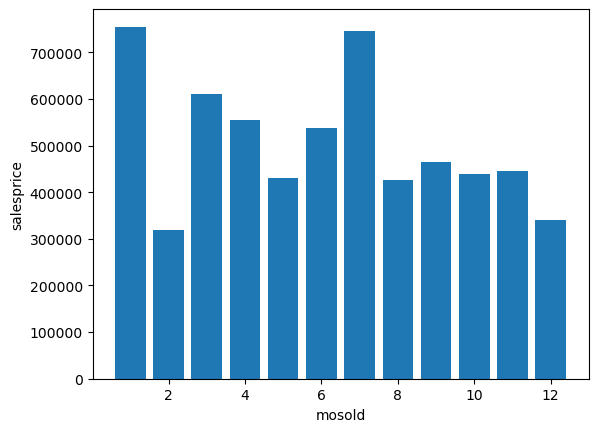

In [43]:
plt.bar(data_cp["MoSold"],data_cp["SalePrice"])
plt.xlabel("mosold")
plt.ylabel("salesprice")

### Boxplot for saleprice

<Axes: xlabel='SalePrice'>

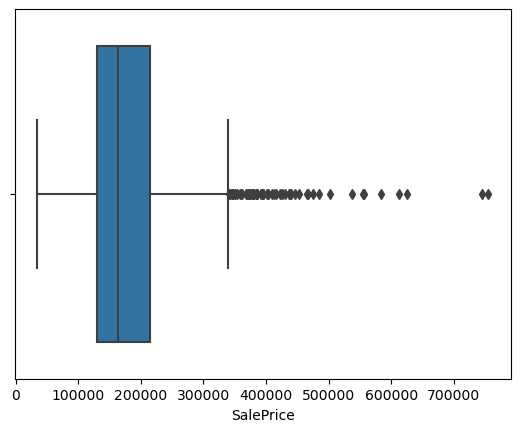

In [44]:
sns.boxplot(x = data['SalePrice'])

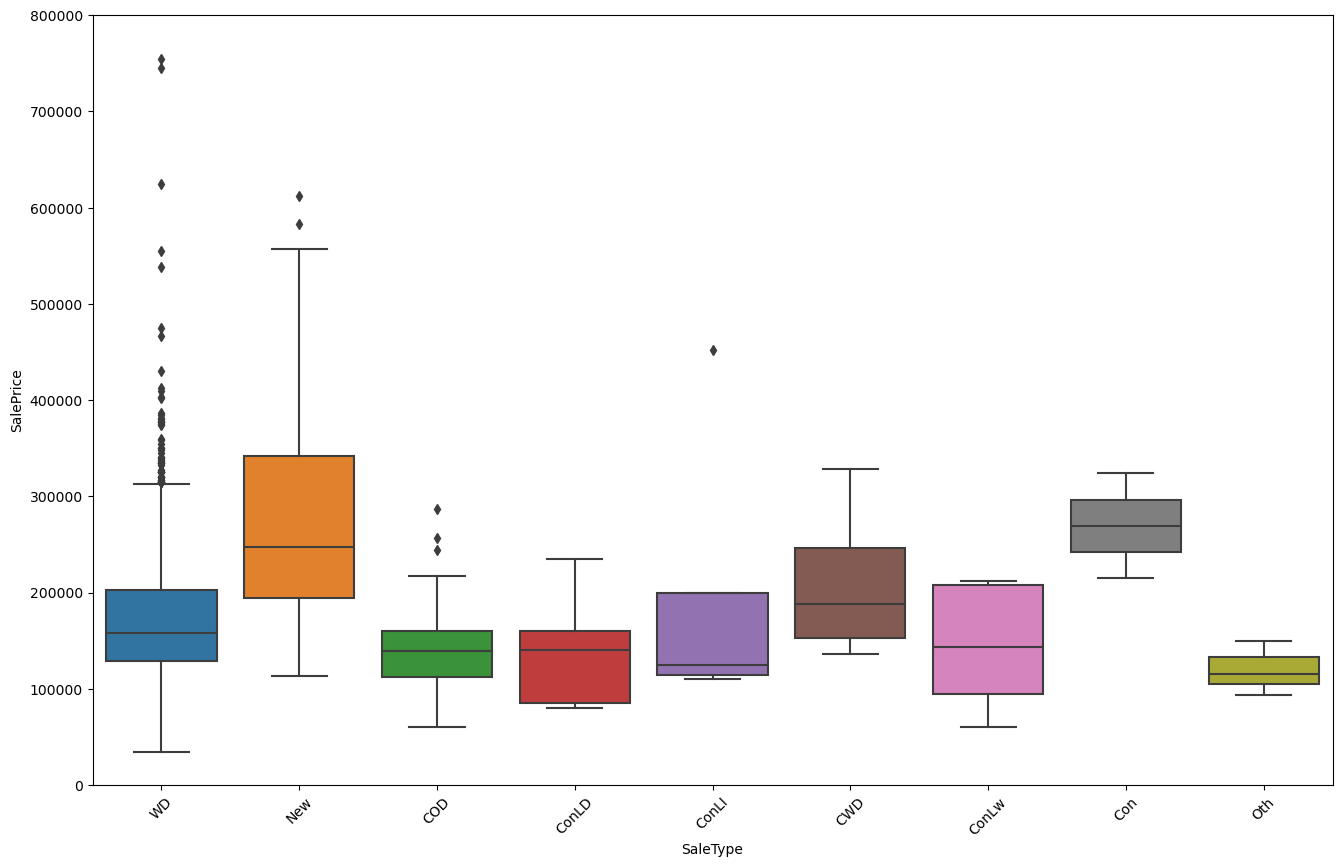

In [45]:
f, ax = plt.subplots(figsize = (16, 10))
fig = sns.boxplot(x = 'SaleType', y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000);
xt = plt.xticks(rotation = 45)

## Feature Transformation

#### Converting columns in str which have categorical nature but on int

In [46]:
df = pd.DataFrame(data_cp)

In [47]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [48]:
feat_dtype_convert = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i in feat_dtype_convert:
    df[i] = df[i].astype(str)

In [49]:
df['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [50]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [51]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [52]:
quan = list(df.loc[:, df.dtypes != 'object'].columns.values)
print(quan)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [53]:
len(quan)

31

In [54]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
print(obj_feat)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


### Categorical into order

In [55]:
from pandas.api.types import CategoricalDtype
df['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes

In [56]:
df['BsmtCond'].unique()

array([3, 4, 2, 1], dtype=int8)

In [57]:
df['BsmtExposure'] = df['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes

In [58]:
df['BsmtExposure'].unique()

array([-1,  3,  1,  2], dtype=int8)

In [59]:
df['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [60]:
df['Utilities'].unique()

array([ 3, -1], dtype=int8)

## Show skewness of feature with distplot

In [61]:
skewed_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF',
                   'EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GrLivArea','HalfBath', 'KitchenAbvGr','LotArea',
                   'LotFrontage','LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
                   'TotalBsmtSF', 'WoodDeckSF']

In [62]:
quan == skewed_features

False

/var/folders/1b/l9shw07j67g31yzczg6s00zm0000gn/T/ipykernel_39008/3347420725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[skewed_features[i]])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1b/l9shw07j67g31yzczg6s00zm0000gn/T/ipykernel_39008/3347420725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

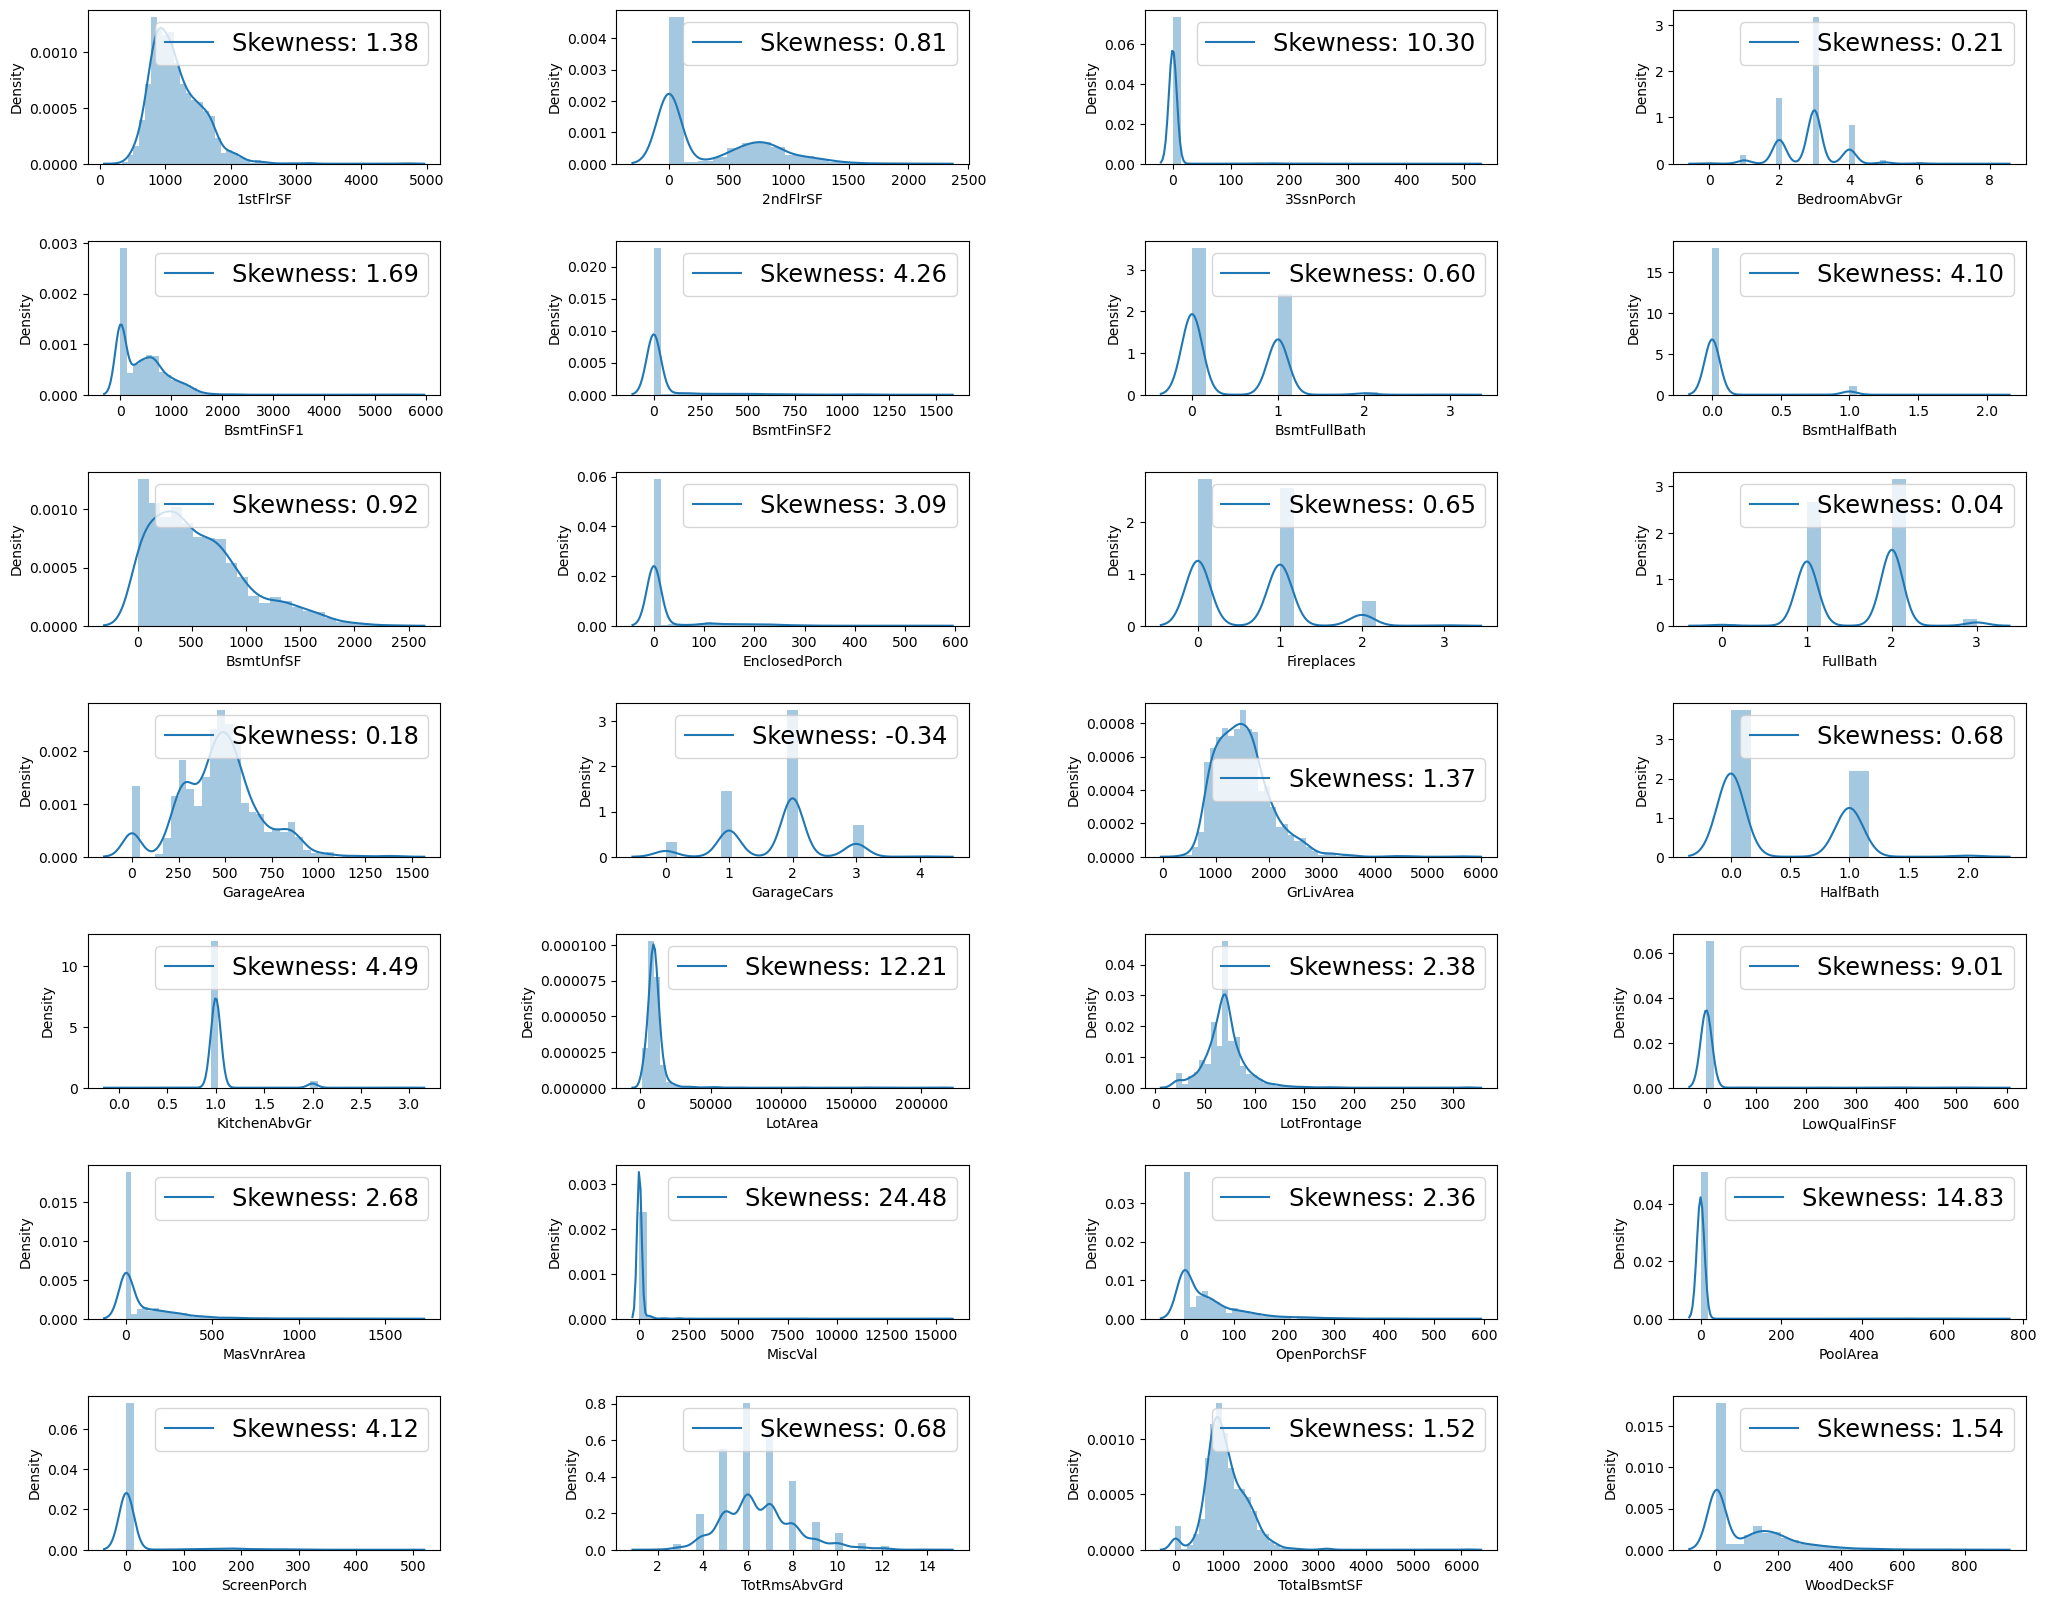

In [63]:
plt.figure(figsize = (25, 20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [64]:
df_back = df

## Decrease the skewnwnes of the data

In [65]:

for i in skewed_features:
    df[i] = np.log(df[i] + 1)

/var/folders/1b/l9shw07j67g31yzczg6s00zm0000gn/T/ipykernel_39008/3849293803.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[skewed_features[i]])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/1b/l9shw07j67g31yzczg6s00zm0000gn/T/ipykernel_39008/3849293803.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a 

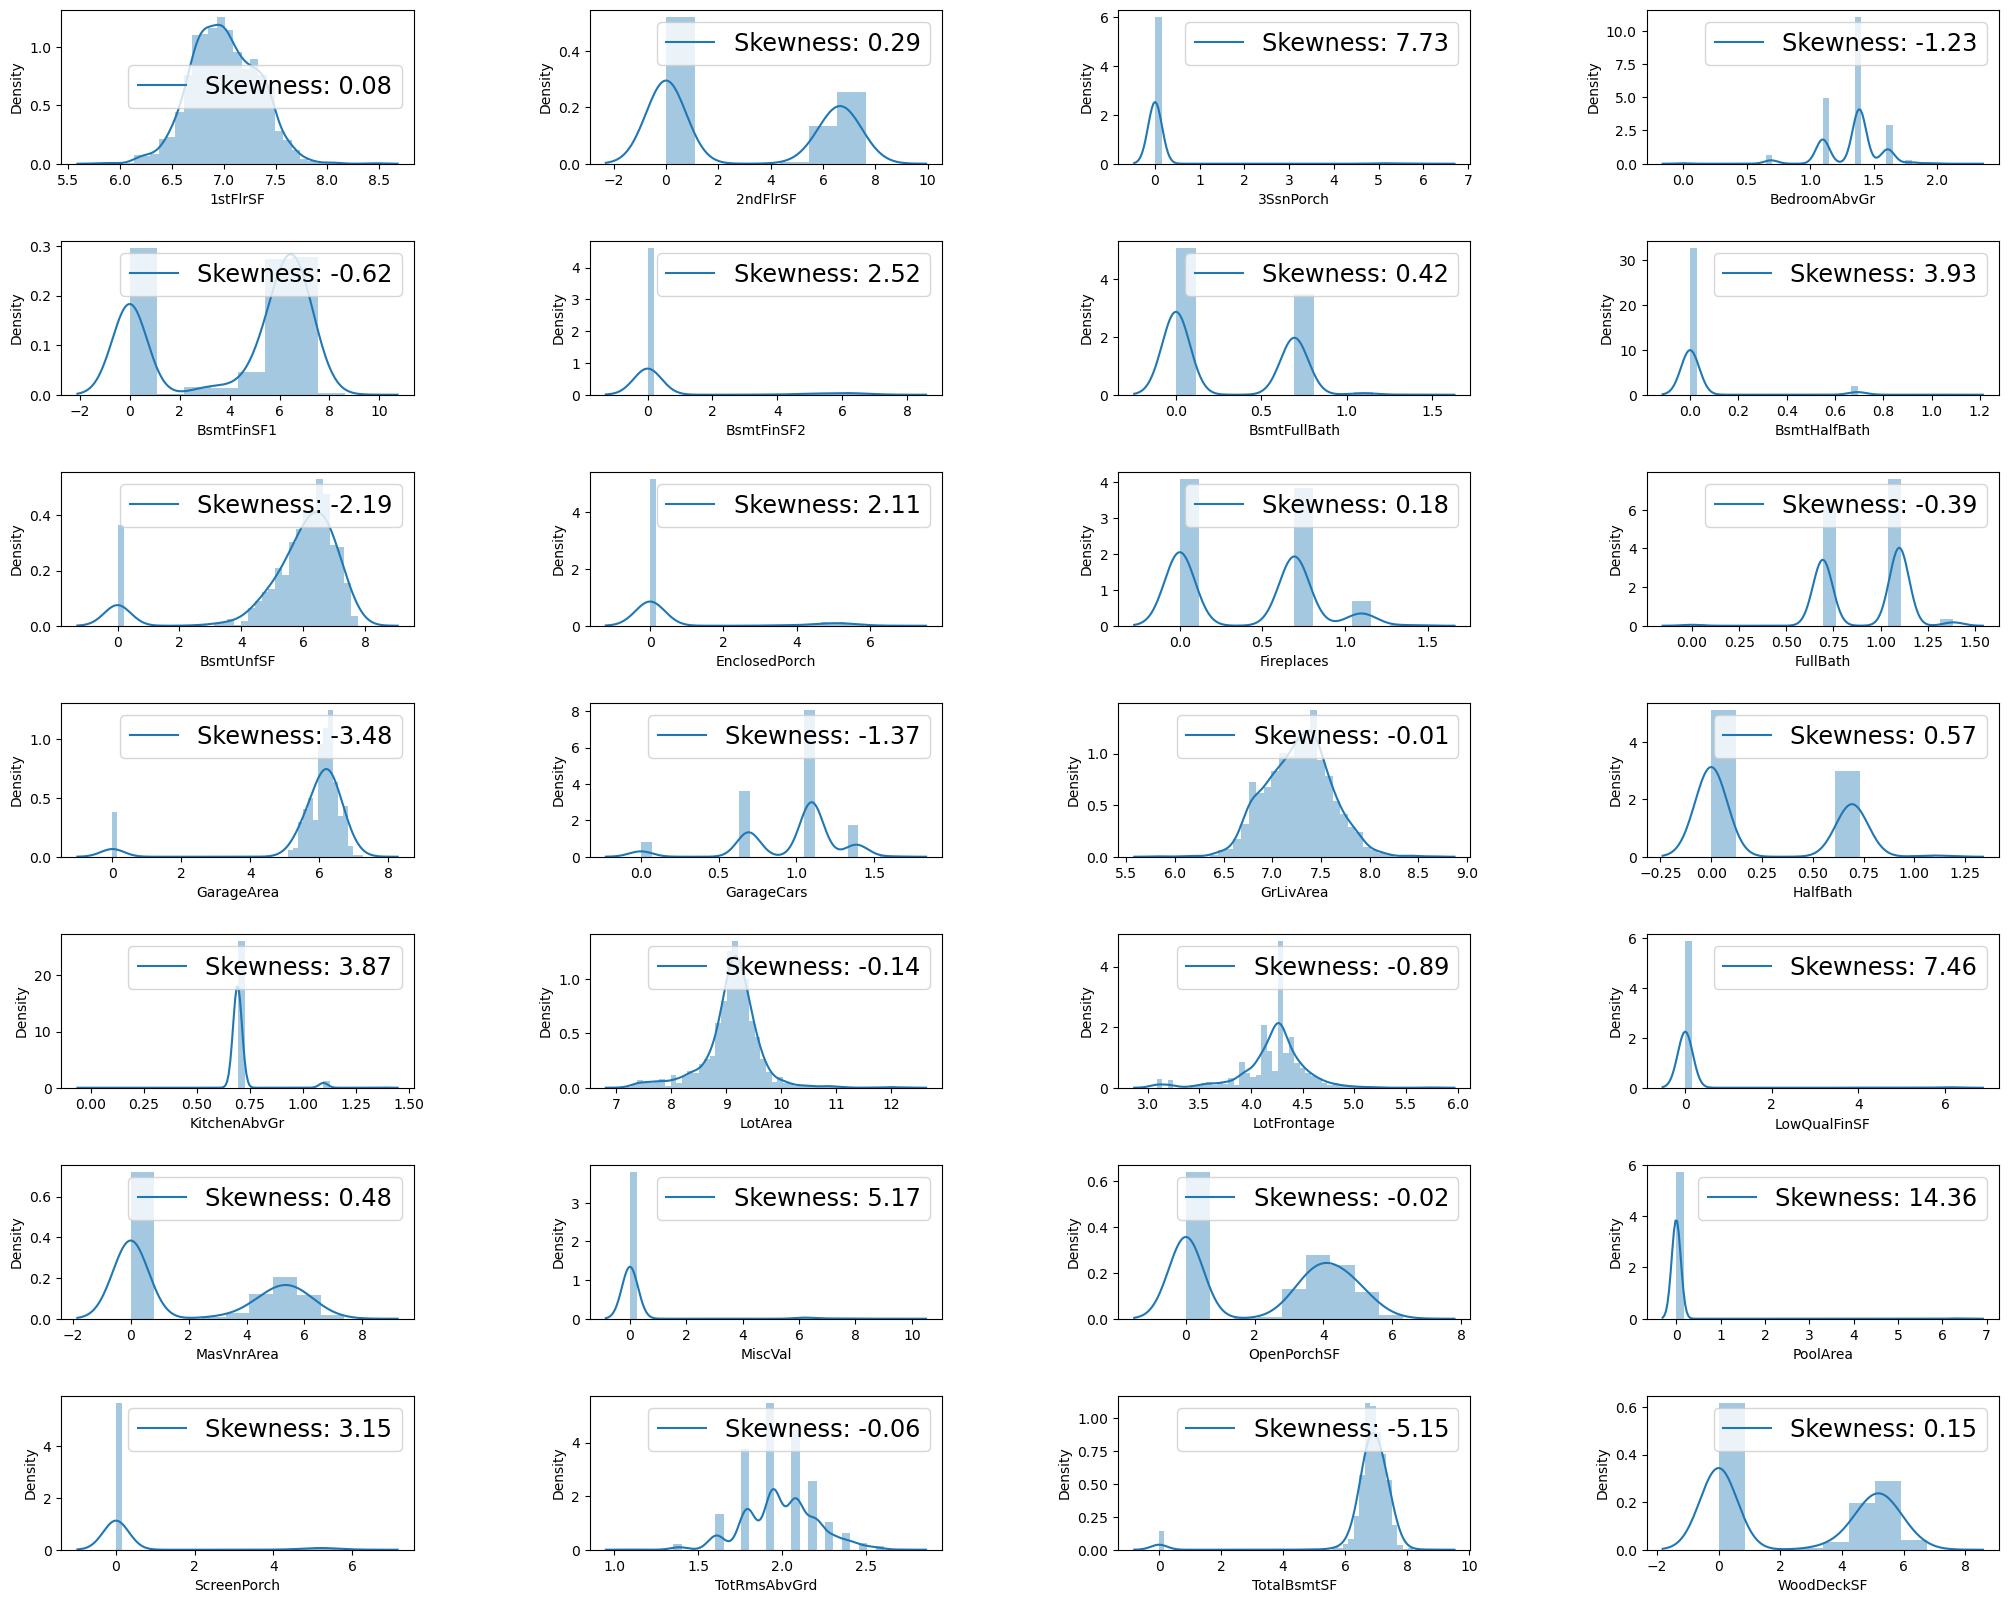

In [66]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed_features[i]].skew())], fontsize = 'xx-large')

In [67]:
SalePrice = np.log(df['SalePrice'] + 1)

In [68]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,Grvl,Reg,Lvl,3,Inside,...,0.0,Gd,MnPrv,Shed,0.0,Feb,2008,WD,Normal,208500
1,20,RL,4.394449,9.169623,Pave,Grvl,Reg,Lvl,3,FR2,...,0.0,Gd,MnPrv,Shed,0.0,May,2007,WD,Normal,181500
2,60,RL,4.234107,9.328212,Pave,Grvl,IR1,Lvl,3,Inside,...,0.0,Gd,MnPrv,Shed,0.0,Sep,2008,WD,Normal,223500
3,70,RL,4.110874,9.164401,Pave,Grvl,IR1,Lvl,3,Corner,...,0.0,Gd,MnPrv,Shed,0.0,Feb,2006,WD,Abnorml,140000
4,60,RL,4.442651,9.565284,Pave,Grvl,IR1,Lvl,3,FR2,...,0.0,Gd,MnPrv,Shed,0.0,Dec,2008,WD,Normal,250000


### Get object feature to convert in numeric using dummy variable

In [69]:

obj_feat = list(df.loc[:,df.dtypes == 'object'].columns.values)
len(obj_feat)

34

In [70]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,Grvl,Reg,Lvl,3,Inside,...,0.0,Gd,MnPrv,Shed,0.0,Feb,2008,WD,Normal,208500
1,20,RL,4.394449,9.169623,Pave,Grvl,Reg,Lvl,3,FR2,...,0.0,Gd,MnPrv,Shed,0.0,May,2007,WD,Normal,181500
2,60,RL,4.234107,9.328212,Pave,Grvl,IR1,Lvl,3,Inside,...,0.0,Gd,MnPrv,Shed,0.0,Sep,2008,WD,Normal,223500
3,70,RL,4.110874,9.164401,Pave,Grvl,IR1,Lvl,3,Corner,...,0.0,Gd,MnPrv,Shed,0.0,Feb,2006,WD,Abnorml,140000
4,60,RL,4.442651,9.565284,Pave,Grvl,IR1,Lvl,3,FR2,...,0.0,Gd,MnPrv,Shed,0.0,Dec,2008,WD,Normal,250000


#### Categorical to numerical

In [71]:
# dummy varaibale
dummy_drop = []
clean_df = df
for i in obj_feat:
    dummy_drop += [i + '_' + str(df[i].unique()[-1])]

df = pd.get_dummies(df, columns = obj_feat)
df = df.drop(dummy_drop, axis = 1)


In [72]:
df.shape

(1460, 498)

In [73]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_'C (all)',MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemo

# Model Bulding

## Test Train Split

In [74]:
df = pd.DataFrame(df)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


## Normalising

In [75]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df)
df = scaler.transform(df)

In [76]:
X.head()

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_'C (all)',MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,LotShape_IR1,LotShape_IR2,LotShape_Reg,LandContour_Bnk,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1975,

In [77]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Normalising X

In [78]:
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 123)

In [80]:
X_train

array([[-0.74843513, -0.16093389,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.87785044, -1.33273791,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00259408, -0.24816137,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  1.82940221,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00259408, -0.26903893,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56244826, -1.06555398,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
X_test

array([[ 0.        ,  0.00650609,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56244826,  0.02968157,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-2.82820532, -2.41448308,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.2227706 , -1.06555398,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48336547,  0.1800786 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70426729,  0.26608764,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [82]:
print(X_train.shape)

(1022, 497)


In [83]:
print(X_test.shape)

(438, 497)


In [84]:
print(Y_train.shape)

(1022,)


## Cross Validation

In [118]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

def test_model(model, X_train = X_train, y_train = Y_train):
    cv = KFold(n_splits=3, shuffle=True, random_state=55)

    r2 = make_scorer(r2_score)
    rmse_scorer = make_scorer(mean_squared_error, squared=False) 
    mae_scorer = make_scorer(mean_absolute_error)

    # Perform cross-validation with R2, RMSE, and MAE
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    rmse_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=rmse_scorer)
    mae_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=mae_scorer)
    

    # Print the mean and standard deviation for all metrics
    print(f"Model: {type(model).__name__}")
    print(f"R^2: {r2_val_score.mean():.4f} +- {r2_val_score.std():.4f}")
    print(f"RMSE: {rmse_val_score.mean():.4f} +- {rmse_val_score.std():.4f}")
    print(f"MAE: {mae_val_score.mean():.4f} +- {mae_val_score.std():.4f}")

    return {
        "R2": {
            "mean": r2_val_score.mean(),
            "std": r2_val_score.std()
        },
        "RMSE": {
            "mean": rmse_val_score.mean(),
            "std": rmse_val_score.std()
        },
        "MAE": {
            "mean": mae_val_score.mean(),
            "std": mae_val_score.std()
        }
    }


#### PLotting function

In [119]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train , y_train, title, scoring='neg_mean_squared_error'):
  train_sizes = np.arange(0.1, 1.01, 0.1)  # Train on 10% to 100% of data in steps of 10%
  cv = KFold(n_splits=3, shuffle=True, random_state=42)
  train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring=scoring)

  # Calculate mean and standard deviation for train and test scores
  train_scores_mean = train_scores.mean(axis=1)
  train_scores_std = train_scores.std(axis=1)
  test_scores_mean = test_scores.mean(axis=1)
  test_scores_std = test_scores.std(axis=1)

  # Plot 
  plt.plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
  plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', marker='o')
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
  plt.title(title)
  plt.xlabel('Training Set Size')
  plt.ylabel(f"{scoring.replace('neg_', '')}") 
  plt.grid(True)
  plt.legend()
  plt.figure(figsize=(8,5))
  plt.show()


In [120]:
# Storing results
model_results = {}

## Linear Regression

In [121]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
model_results["Linear Regression"] = test_model(LR)


Model: LinearRegression
R^2: -35987578443237339168768.0000 +- 50894121511391869272064.0000
RMSE: 8634795511884003.0000 +- 12211444921135542.0000
MAE: 490481662146092.0000 +- 693645818641377.1250


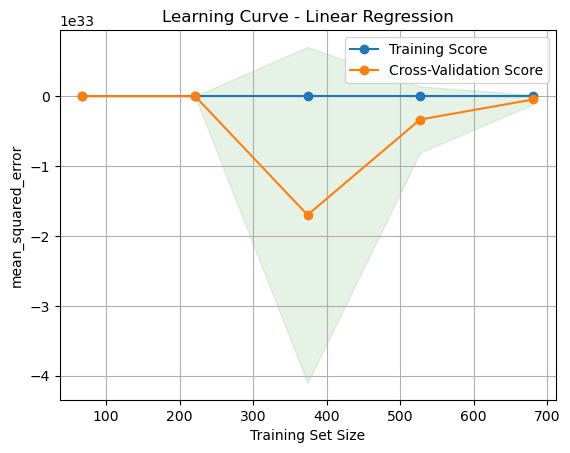

<Figure size 800x500 with 0 Axes>

In [122]:
plot_learning_curve(LR, X_train, Y_train, title='Learning Curve - Linear Regression')

In [123]:
LR.fit(X_train,Y_train)
price_predict = LR.predict(X_test)

price_predict = LR.predict(X_test)
print(price_predict)

[ 2.27635539e+05  4.57235395e+04  1.38021013e+05  2.61471523e+05
  1.21525539e+05  2.50247932e+05  3.28794814e+05 -9.36460543e+02
  1.39103539e+05  1.42797500e+05  1.36077063e+05  2.28434039e+05
  1.60373710e+05  8.44089037e+04  2.62873539e+05  2.21975539e+05
  1.78677539e+05  3.47176394e+05  2.04307367e+05  1.95123539e+05
  1.56411539e+05  1.75923539e+05  1.45175539e+05  1.95223499e+05
  2.22615539e+05  1.44291914e+05  2.62844271e+05  1.95275990e+05
  9.07323060e+04  1.45240763e+05  1.01023539e+05  2.35383536e+05
  1.34165539e+05  1.61442063e+05  3.82617536e+05  1.82691013e+05
  1.66096039e+05  9.18520336e+15  1.68171539e+05  8.05395395e+04
  1.96853539e+05  1.89684305e+05  2.50767539e+05  1.45267442e+05
  2.04645539e+05  8.89548627e+04  3.22747536e+05  3.06569539e+05
  2.22603053e+05  1.19831539e+05  2.30013410e+05  2.19902260e+05
  1.57431539e+05  1.42685539e+05  1.40619539e+05  2.02157251e+05
  1.68533539e+05  2.37918036e+05  1.14117947e+05  3.77417505e+05
  1.16683555e+05  3.03444

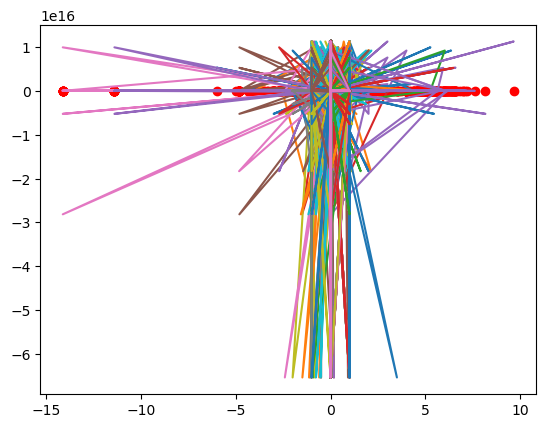

In [124]:
plt.plot(X_test,Y_test,"ro")
plt.plot(X_test,price_predict)

In [125]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = Y_train, cv = 10)
print("Cross validation accuracy of LR model = ", cross_validation)

Cross validation accuracy of LR model =  [-9.23201648e-02 -1.51294960e+19 -1.28003521e+22  2.24939917e-01
  6.62391892e-01  5.61559914e-01 -2.04515974e+18  6.45260456e-01
  2.17152676e-01  6.27914901e-01]


In [126]:
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())


Cross validation mean accuracy of LR model =  -1.2817526746301423e+21


## Rigde Linear Model

In [127]:
rdg = linear_model.Ridge()
model_results["Ridge"] = test_model(rdg)

Model: Ridge
R^2: 0.7562 +- 0.0237
RMSE: 39857.6198 +- 1204.0803
MAE: 25401.5066 +- 921.6414


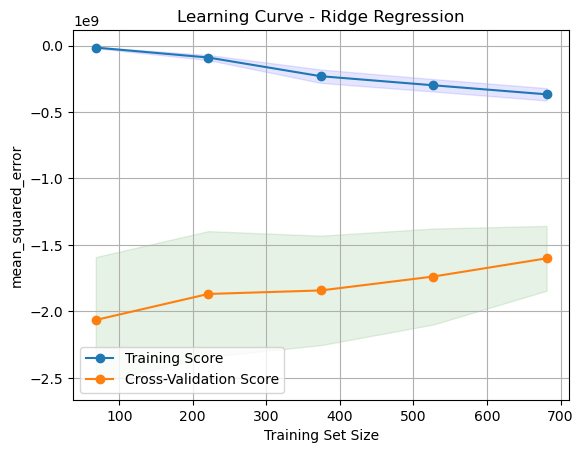

<Figure size 800x500 with 0 Axes>

In [128]:
plot_learning_curve(rdg, X_train, Y_train, title='Learning Curve - Ridge Regression')

## Lasso Linear Model

In [129]:
lasso = linear_model.Lasso(alpha=1e-4)
model_results["Lasso"] = test_model(lasso)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.999e+10, tolerance: 4.572e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.290e+10, tolerance: 4.366e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.425e+10, toler

Model: Lasso
R^2: 0.3608 +- 0.0699
RMSE: 64518.4601 +- 2252.8384
MAE: 42840.3664 +- 217.4964


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.425e+10, tolerance: 4.445e+08
  model = cd_fast.enet_coordinate_descent(


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.338e+09, tolerance: 2.358e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.788e+10, tolerance: 3.306e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.796e+10, toler

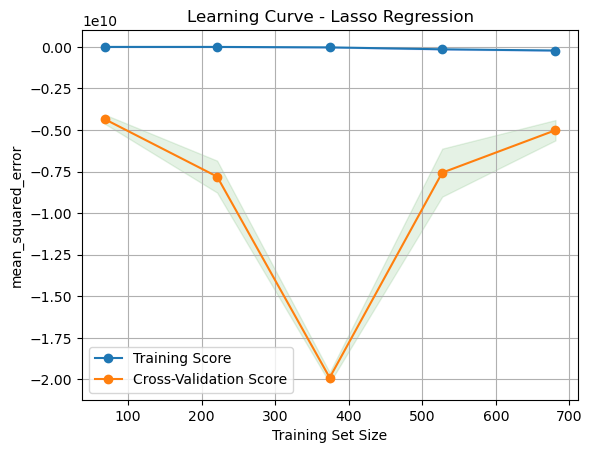

<Figure size 800x500 with 0 Axes>

In [130]:
plot_learning_curve(lasso, X_train, Y_train, title='Learning Curve - Lasso Regression')

## Support Vector Machine

In [131]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
model_results["SVR"] = test_model(svr_reg)

Model: SVR
R^2: -0.0576 +- 0.0114
RMSE: 83186.7459 +- 1234.6040
MAE: 56075.7939 +- 1284.1460


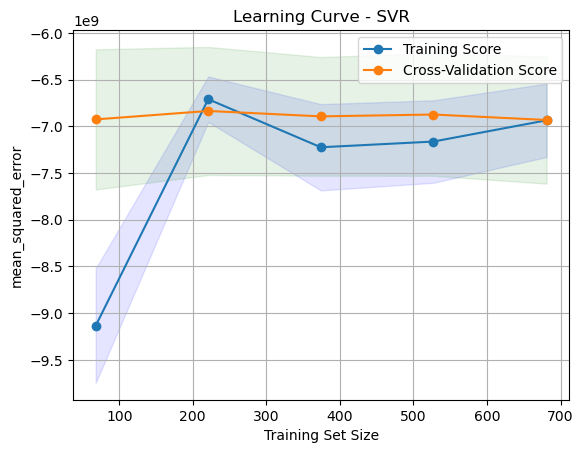

<Figure size 800x500 with 0 Axes>

In [132]:
plot_learning_curve(svr_reg, X_train, Y_train, title='Learning Curve - SVR')

## Decision Tree Regressor

In [133]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
model_results["Decision Tree"] = test_model(dt_reg)

Model: DecisionTreeRegressor
R^2: 0.7167 +- 0.0200
RMSE: 43000.6714 +- 740.5498
MAE: 28044.2672 +- 940.5077


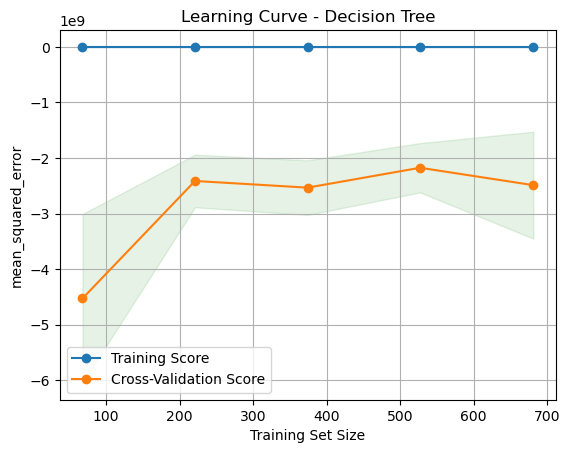

<Figure size 800x500 with 0 Axes>

In [100]:
plot_learning_curve(dt_reg, X_train, Y_train, title='Learning Curve - Decision Tree')

## Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
model_results["Random Forest"] = test_model(rf_reg)

Model: RandomForestRegressor
R^2: 0.8359 +- 0.0088
RMSE: 32766.4317 +- 1154.1879
MAE: 19473.7213 +- 1450.5185


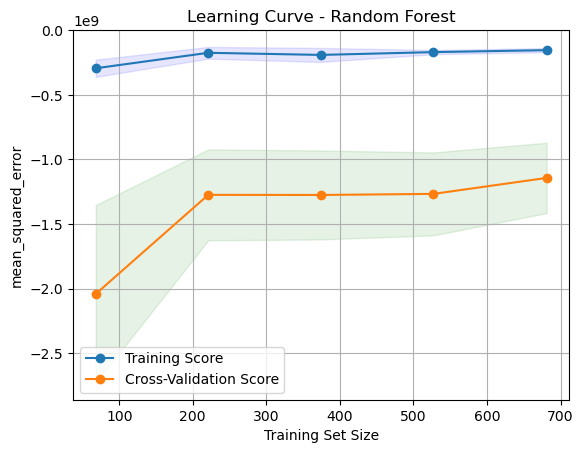

<Figure size 800x500 with 0 Axes>

In [135]:
plot_learning_curve(rf_reg, X_train, Y_train, title='Learning Curve - Random Forest')

## Bagging & Boosting

In [136]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=71)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='squared_error', random_state=71)

In [137]:
model_results["Bagging"] = test_model(br_reg)

Model: BaggingRegressor
R^2: 0.8365 +- 0.0099
RMSE: 32700.4498 +- 1347.9056
MAE: 19492.2219 +- 1486.7437


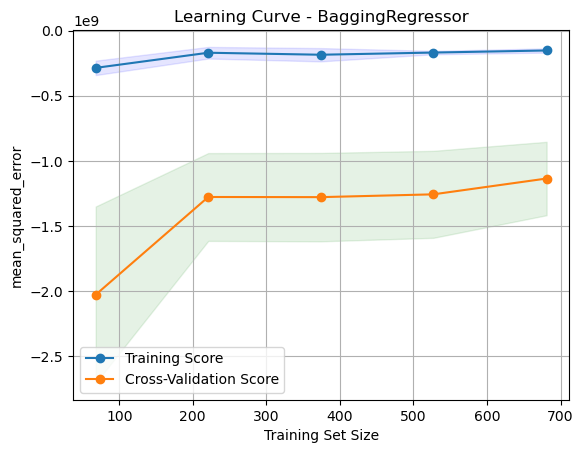

<Figure size 800x500 with 0 Axes>

In [138]:
plot_learning_curve(br_reg, X_train, Y_train, title='Learning Curve - BaggingRegressor')

In [139]:
model_results["Gradient Boosting"] = test_model(gbr_reg)

Model: GradientBoostingRegressor
R^2: 0.8768 +- 0.0132
RMSE: 28384.6139 +- 2066.9760
MAE: 17625.7837 +- 1184.7024


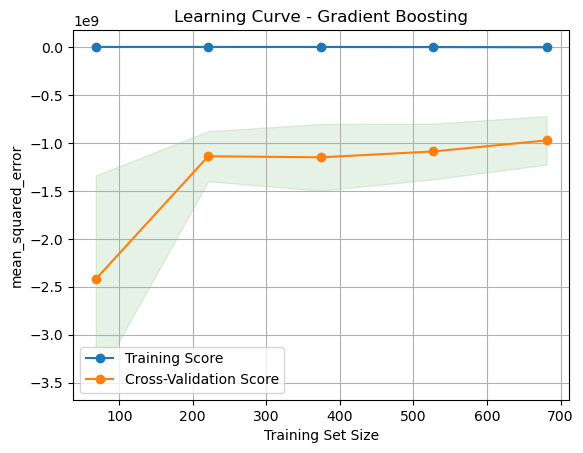

<Figure size 800x500 with 0 Axes>

In [140]:
plot_learning_curve(gbr_reg, X_train, Y_train, title='Learning Curve - Gradient Boosting')

## XGBoost

In [141]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
model_results["XGBoost"] = test_model(xgb_reg)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning

Model: XGBRegressor
R^2: 0.8140 +- 0.0459
RMSE: 34646.4006 +- 4293.2429
MAE: 19799.2101 +- 1451.0378


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [09:27:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "bbooster" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning

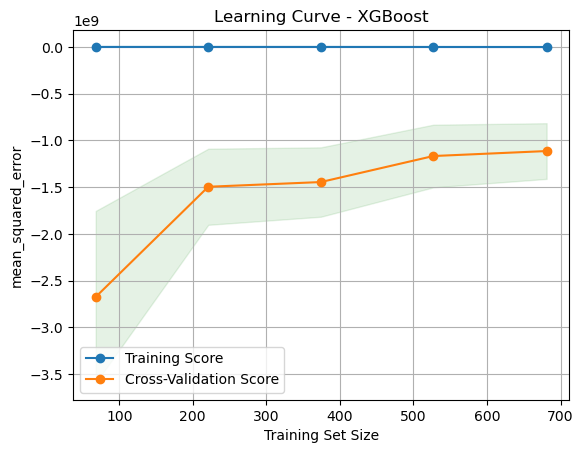

<Figure size 800x500 with 0 Axes>

In [142]:
plot_learning_curve(xgb_reg, X_train, Y_train, title='Learning Curve - XGBoost')

## Performance Comparisions

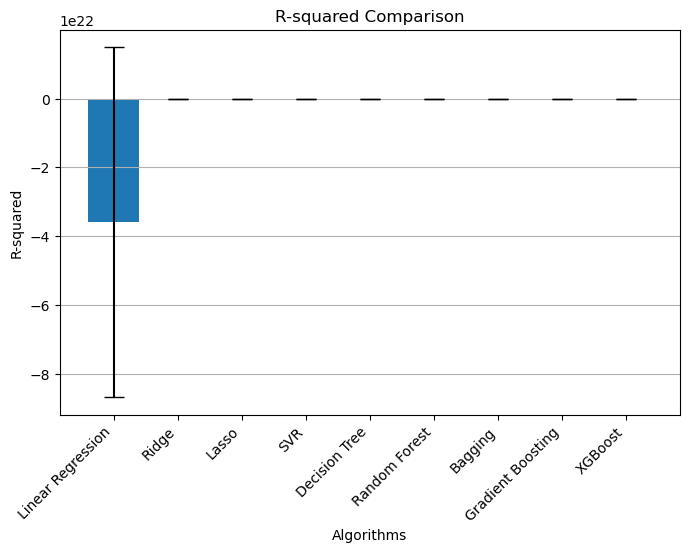

In [152]:

algorithms = list(model_results.keys())  # Get model names as list

r2_scores = [model_results[model]["R2"]["mean"] for model in algorithms]
r2_stds = [model_results[model]["R2"]["std"] for model in algorithms]

rmse_scores = [model_results[model]["RMSE"]["mean"] for model in algorithms]
rmse_stds = [model_results[model]["RMSE"]["std"] for model in algorithms]

mae_scores = [model_results[model]["MAE"]["mean"] for model in algorithms]
mae_stds = [model_results[model]["MAE"]["std"] for model in algorithms]

plt.figure(figsize=(8,5))

# R-squared
# plt.subplot(1, 3, 1)
plt.bar(algorithms, r2_scores, yerr=r2_stds, capsize=7, label="R-squared")
plt.xlabel("Algorithms")
plt.ylabel("R-squared")
plt.title("R-squared Comparison")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')



# # Customize the plot (optional)
# plt.tight_layout()
# plt.legend()
plt.show()


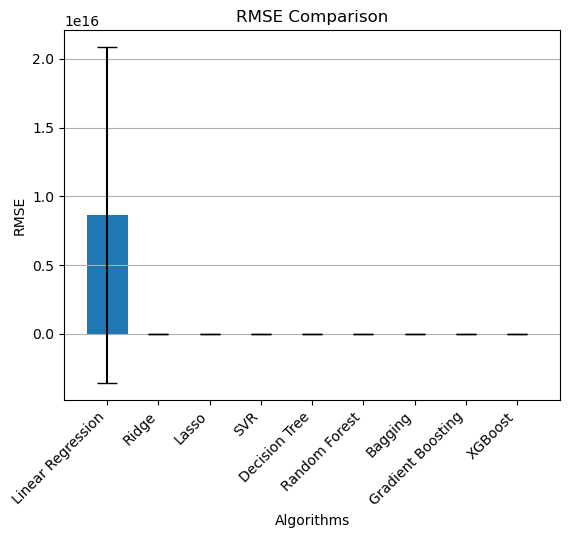

In [153]:
# RMSE
# plt.subplot(1, 3, 2)
plt.bar(algorithms, rmse_scores, yerr=rmse_stds, capsize=7, label="RMSE")
plt.xlabel("Algorithms")
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

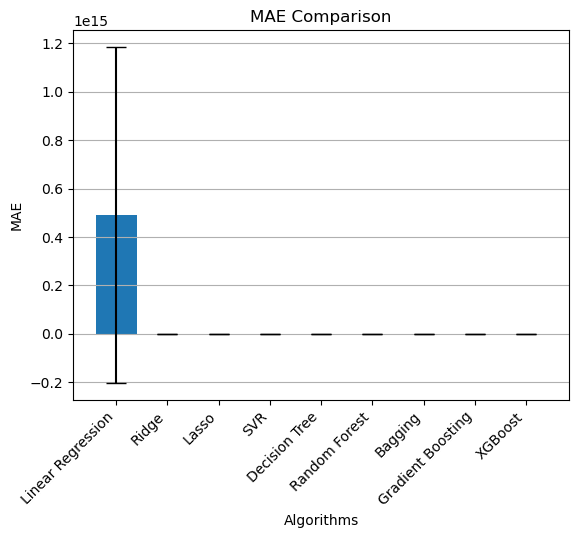

In [154]:
# MAE
# plt.subplot(1, 3, 3)
plt.bar(algorithms, mae_scores, yerr=mae_stds, capsize=7, label="MAE")
plt.xlabel("Algorithms")
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## Performance comparision in line plot

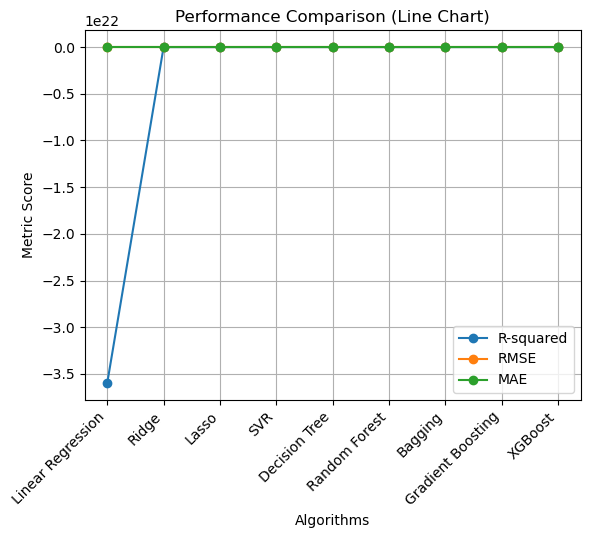

In [155]:
metrics = ["R2", "RMSE", "MAE"]
metric_labels = {"R2": "R-squared", "RMSE": "RMSE", "MAE": "MAE"}  # Labels for legend

for metric in metrics:
  # Extract scores for each algorithm
  scores = [model_results[model][metric]["mean"] for model in algorithms]
  plt.plot(algorithms, scores, marker='o', linestyle='-', label=metric_labels[metric])

# Customize the plot
plt.xlabel("Algorithms")
plt.ylabel("Metric Score")
plt.title("Performance Comparison (Line Chart)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.show()